<a href="https://colab.research.google.com/github/cinumell/stock_price_prediction_Deep_Learning/blob/main/Time_Step_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction 



1.   Amazon - AMZN
2.   Apple - AAPL
3.   Microsoft - MSFT
4. Google - GOOGL
5. Tesla - TSLA
6. Oracle - ORCL


### Evaluation by varying Time Step values

We create datasets by varying time steps
Time steps used are - 30, 40, 50, 70, 90

We used LTSM model to check the mean squared error for Oracle dataset. 

The Time step or Time window is the length of input we provide to the model, which consists of the latest k days' worth of stock price data, where k is the time step. As k is varied, the testing and training data error varies. Here, we can see that k=70 yielded the ideal number for both testing and training data, as well as a considerable reduction in baseline error. We thus picked k=70.


In [ ]:
# Dataset download
import pandas_datareader as pr
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

company = 'ORCL'
price_type = 'close'

data = pr.get_data_tiingo(company, api_key="0f6351ae343427e511f4d085681db7e303ffb969")
data.to_csv(company+'.csv')

data = pd.read_csv(company+'.csv')

# Converting data to timeseries input

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]  
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

Prediction = list()

MError = list()
MTrain_size = list()
MTest_size = list()
MTrain_error = list()
MTest_error = list()


for step in [30, 40, 50, 70, 90]:

  # Baseline calculation


  Price = data[price_type]
  Means = list()

  for i in range(len(Price) - step):
    Means.append(sum(Price[i:i+step])/step)  

  Error = math.sqrt(mean_squared_error(Price[step:],Means))

  # MinMax Scalimg
  import numpy as np
  from sklearn.preprocessing import MinMaxScaler

  mms = MinMaxScaler(feature_range=(0,1))
  Price = mms.fit_transform(np.array(Price).reshape(-1,1))

  # Dataset split into train and test sets

  train_size = int(len(Price)*0.80)
  test_size = len(Price)-train_size
  train_data,test_data = Price[0:train_size,:],Price[train_size:len(Price),:1]
  
  # Converting data to timeseries input

  time_step = step
  trainX, trainY = create_dataset(train_data, time_step)
  testX, testY = create_dataset(test_data, time_step)

  trainX = trainX.reshape(trainX.shape[0],trainX.shape[1] , 1)
  testX = testX.reshape(testX.shape[0],testX.shape[1] , 1)

  # Stacked LSTM model

  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import LSTM
  from tensorflow.keras.layers import Dense

  model = Sequential()
  model.add(LSTM(128, return_sequences=True, input_shape= (step, 1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(25))

  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')

  #Training the model
  model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,batch_size=64,verbose=1)

  # Prediction and error calculation

  train_predict = model.predict(trainX)
  test_predict = model.predict(testX)

  testY = testY.reshape(test_size-step-1,1)
  trainY = trainY.reshape(train_size-step-1,1)

  testY = mms.inverse_transform(testY)
  trainY = mms.inverse_transform(trainY)


  train_predict = mms.inverse_transform(train_predict)
  test_predict = mms.inverse_transform(test_predict)


  MError.append(Error)
  MTrain_size.append(train_size-step-1)
  MTest_size.append(test_size-step-1)
  MTrain_error.append(math.sqrt(mean_squared_error(trainY,train_predict)))
  MTest_error.append(math.sqrt(mean_squared_error(testY,test_predict)))
  Prediction.append(test_predict)



/var/folders/p6/vpj9j15x7774phthzn6s023m0000gn/T/ipykernel_46625/900591216.py:11: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pr.get_data_tiingo(company, api_key="0f6351ae343427e511f4d085681db7e303ffb969")


Epoch 1/100


2022-11-28 23:05:37.035234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:05:37.209329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:05:37.324623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:05:37.511880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/16 [>.............................] - ETA: 30s - loss: 0.1398

2022-11-28 23:05:37.700734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 0.0262

2022-11-28 23:05:38.916544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:05:38.968429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:05:39.042293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 95ms/step - loss: 0.0262 - val_loss: 0.0053
Epoch 2/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 3/100
16/16 [==============================] - 0s 28ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 4/100
16/16 [==============================] - 0s 32ms/step - loss: 9.3974e-04 - val_loss: 0.0029
Epoch 5/100
16/16 [==============================] - 0s 29ms/step - loss: 8.9036e-04 - val_loss: 0.0030
Epoch 6/100
16/16 [==============================] - 0s 28ms/step - loss: 9.0735e-04 - val_loss: 0.0034
Epoch 7/100
16/16 [==============================] - 0s 30ms/step - loss: 8.7590e-04 - val_loss: 0.0032
Epoch 8/100
16/16 [==============================] - 0s 28ms/step - loss: 8.6301e-04 - val_loss: 0.0033
Epoch 9/100
16/16 [==============================] - 1s 32ms/step - loss: 8.5355e-04 - val_loss: 0.0026
Epoch 10/100
16/16 [==============================] - 0s 30ms/step - loss: 8.5546e-04 - 

2022-11-28 23:06:23.241688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:06:23.291986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:06:23.367341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 24ms/step
Epoch 1/100


2022-11-28 23:06:25.800545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:06:25.946019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:06:26.037595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:06:26.185905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 1/16 [>.............................] - ETA: 32s - loss: 0.2011

2022-11-28 23:06:26.365512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 0.0325

2022-11-28 23:06:27.716311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:06:27.773093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:06:27.859013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 106ms/step - loss: 0.0325 - val_loss: 0.0152
Epoch 2/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0031 - val_loss: 0.0044
Epoch 3/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 4/100
16/16 [==============================] - 1s 33ms/step - loss: 9.7817e-04 - val_loss: 0.0028
Epoch 5/100
16/16 [==============================] - 1s 34ms/step - loss: 9.6523e-04 - val_loss: 0.0028
Epoch 6/100
16/16 [==============================] - 1s 34ms/step - loss: 9.1234e-04 - val_loss: 0.0028
Epoch 7/100
16/16 [==============================] - 1s 33ms/step - loss: 8.9051e-04 - val_loss: 0.0029
Epoch 8/100
16/16 [==============================] - 1s 33ms/step - loss: 8.5856e-04 - val_loss: 0.0028
Epoch 9/100
16/16 [==============================] - 1s 34ms/step - loss: 8.5988e-04 - val_loss: 0.0025
Epoch 10/100
16/16 [==============================] - 1s 41ms/step - loss: 8.6842e-04 -

2022-11-28 23:07:21.346899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:07:21.396699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:07:21.485981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 30ms/step
Epoch 1/100


2022-11-28 23:07:24.046840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:07:24.193294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:07:24.299722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:07:24.477188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:07:24.693024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 0.0254

2022-11-28 23:07:26.277439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:07:26.334296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:07:26.435777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 4s 132ms/step - loss: 0.0254 - val_loss: 0.0079
Epoch 2/100
15/15 [==============================] - 1s 41ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 3/100
15/15 [==============================] - 1s 38ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 4/100
15/15 [==============================] - 1s 43ms/step - loss: 9.8541e-04 - val_loss: 0.0027
Epoch 5/100
15/15 [==============================] - 1s 41ms/step - loss: 8.8454e-04 - val_loss: 0.0029
Epoch 6/100
15/15 [==============================] - 1s 39ms/step - loss: 8.7208e-04 - val_loss: 0.0028
Epoch 7/100
15/15 [==============================] - 1s 42ms/step - loss: 8.4680e-04 - val_loss: 0.0026
Epoch 8/100
15/15 [==============================] - 1s 39ms/step - loss: 8.2750e-04 - val_loss: 0.0026
Epoch 9/100
15/15 [==============================] - 1s 44ms/step - loss: 8.5872e-04 - val_loss: 0.0026
Epoch 10/100
15/15 [==============================] - 1s 38ms/step - loss: 8.0540e-04 -

2022-11-28 23:08:23.944509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:08:24.006106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:08:24.122317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 36ms/step
Epoch 1/100


2022-11-28 23:08:26.874225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:08:27.027885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:08:27.150878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:08:27.338144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:08:27.642851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 0.0222

2022-11-28 23:08:29.404013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:08:29.457784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:08:29.576867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 5s 147ms/step - loss: 0.0222 - val_loss: 0.0060
Epoch 2/100
15/15 [==============================] - 1s 48ms/step - loss: 0.0026 - val_loss: 0.0041
Epoch 3/100
15/15 [==============================] - 1s 54ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 4/100
15/15 [==============================] - 1s 49ms/step - loss: 9.6533e-04 - val_loss: 0.0030
Epoch 5/100
15/15 [==============================] - 1s 47ms/step - loss: 9.1686e-04 - val_loss: 0.0029
Epoch 6/100
15/15 [==============================] - 1s 47ms/step - loss: 8.9062e-04 - val_loss: 0.0029
Epoch 7/100
15/15 [==============================] - 1s 47ms/step - loss: 8.9726e-04 - val_loss: 0.0028
Epoch 8/100
15/15 [==============================] - 1s 52ms/step - loss: 8.7112e-04 - val_loss: 0.0027
Epoch 9/100
15/15 [==============================] - 1s 46ms/step - loss: 8.5787e-04 - val_loss: 0.0027
Epoch 10/100
15/15 [==============================] - 1s 47ms/step - loss: 8.8018e-04 -

2022-11-28 23:09:39.337636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:09:39.397127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:09:39.533335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 55ms/step
Epoch 1/100


2022-11-28 23:09:42.700115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:09:42.847432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:09:43.022259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:09:43.311248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:09:43.649894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 0.0323

2022-11-28 23:09:46.065059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:09:46.118180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:09:46.286865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 6s 200ms/step - loss: 0.0323 - val_loss: 0.0134
Epoch 2/100
15/15 [==============================] - 1s 64ms/step - loss: 0.0033 - val_loss: 0.0044
Epoch 3/100
15/15 [==============================] - 1s 64ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 4/100
15/15 [==============================] - 1s 59ms/step - loss: 9.6415e-04 - val_loss: 0.0030
Epoch 5/100
15/15 [==============================] - 1s 57ms/step - loss: 8.9940e-04 - val_loss: 0.0031
Epoch 6/100
15/15 [==============================] - 1s 59ms/step - loss: 9.1957e-04 - val_loss: 0.0029
Epoch 7/100
15/15 [==============================] - 1s 57ms/step - loss: 8.6547e-04 - val_loss: 0.0031
Epoch 8/100
15/15 [==============================] - 1s 57ms/step - loss: 8.5188e-04 - val_loss: 0.0029
Epoch 9/100
15/15 [==============================] - 1s 55ms/step - loss: 8.5178e-04 - val_loss: 0.0027
Epoch 10/100
15/15 [==============================] - 1s 56ms/step - loss: 8.1463e-04 -

2022-11-28 23:11:02.956860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:11:03.001038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 23:11:03.155189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 67ms/step


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 90, 128)           66560     
                                                                 
 lstm_19 (LSTM)              (None, 64)                49408     
                                                                 
 dense_18 (Dense)            (None, 25)                1625      
                                                                 
 dense_19 (Dense)            (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
For step: 30
Baseline error: 3.3730412434751793
Train size: 975
Test size: 221
Train error: 0.9800706707105888
Test error: 1.5954978901912222
For step: 40
Baseline error: 3.7488374

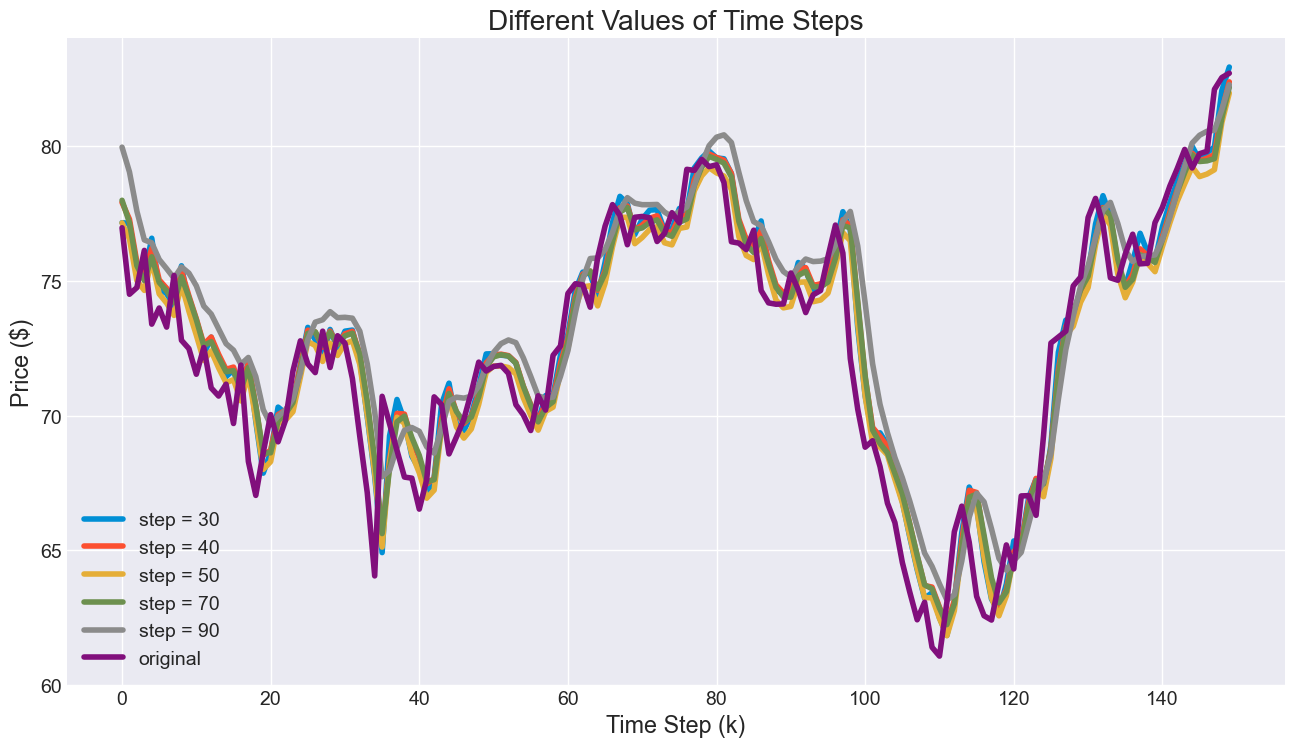

In [ ]:
model.summary()
steps = [30, 40, 50, 70, 90]
for i in range(len(steps)):
  print("For step:",steps[i])
  print("Baseline error:",MError[i])
  print("Train size:",MTrain_size[i])
  print("Test size:",MTest_size[i])
  print("Train error:",MTrain_error[i])
  print("Test error:",MTest_error[i])

plt.style.use('seaborn-darkgrid')
fig,ax = plt.subplots(figsize=(14,8))
plt.title("Different Values of Time Steps")
#Customize
ax.set(title=f'Different Values of Time Steps', 
       xlabel='Time Step (k)',
       ylabel='Price ($)')

ax.plot(Prediction[0][-150:],label = "step = 30")
ax.plot(Prediction[1][-150:],label = "step = 40")
ax.plot(Prediction[2][-150:],label = "step = 50")
ax.plot(Prediction[3][-150:],label = "step = 70")
ax.plot(Prediction[4][-150:],label = "step = 90")
ax.plot(testY[-150:],label = "original")
ax.legend()